In [19]:
import numpy as np
import matplotlib.pyplot as plt

#### 0. Idea

This is just a simple simulation exercise to <B>simulate the following Stochastic Integral</B> and calculate its <B>mean</B> and <B>variance</B>

$$\int_0^1 t^2 \, dW(t)$$

#### 1. Define function for computing integral

In [20]:
def ComputeIntegral(no_of_paths, no_of_steps, T, g):
    z = np.random.normal(0.0, 1.0, [no_of_paths, no_of_steps])
    W = np.zeros([no_of_paths, no_of_steps+1])
    I = np.zeros([no_of_paths, no_of_steps+1])
    time = np.zeros([no_of_steps+1])

    dt = T / float(no_of_steps)
    
    for i in range(0, no_of_steps):
        z[:,i] = (z[:,i] - np.mean(z[:,i])) / np.std(z[:,i])
        W[:,i+1] = W[:,i] + (dt ** 0.5) * z[:,i]
        I[:,i+1] = I[:,i] + g(time[i]) * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] + dt

    paths = {"time": time, "W": W, "I": I}
    return paths

#### 2. Setting parameters

In [21]:
no_of_paths = 10000
no_of_steps = 1000
T = 1
g = lambda t: t**2

output = ComputeIntegral(no_of_paths, no_of_steps, T, g)
time = output["time"]
I = output["I"]

#### 3. Visualizing result

Text(0.5, 1.0, 'Stochastic Integral')

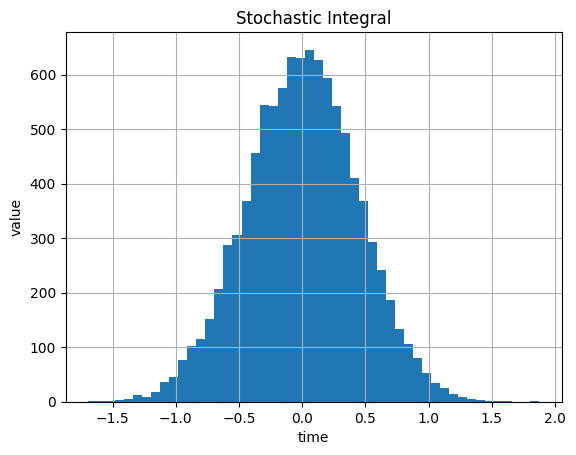

In [22]:
plt.figure(1)
plt.grid()
plt.hist(I[:, -1], 50)
plt.xlabel("time")
plt.ylabel("value")
plt.title("Stochastic Integral")

#### 4. Result summary

In [26]:
mean = np.mean(I[:,-1])
variance = np.var(I[:,-1])
print(f'Mean = {mean} and variance = {variance}')

Mean = -9.237055564881302e-18 and variance = 0.19444643621427057
